<style>
@media (prefers-color-scheme: dark) {
    .title-main {
        color: #4dabf7; /* bright blue for dark mode */
    }
    .title-sub {
        color: #90caf9; /* lighter blue for subtitle */
    }
}

@media (prefers-color-scheme: light) {
    .title-main {
        color: #1e40af; /* deep blue for light mode */
    }
    .title-sub {
        color: #3b82f6; /* medium blue for subtitle */
    }
}

.title-container {
    text-align: center;
    margin: 2em 0;
    font-family: "Segoe UI", Arial, sans-serif;
}

.title-main {
    font-weight: 700;
    letter-spacing: 0.5px;
    margin-bottom: 0.25em;
}

.title-sub {
    font-size: 1.1em;
    margin-top: 0;
}
</style>

<div class="title-container">
    <h1 class="title-main">
        Predictive Analysis &amp; Model Training
    </h1>
    <p class="title-sub">
        Bank Customer Dataset
    </p>
</div>


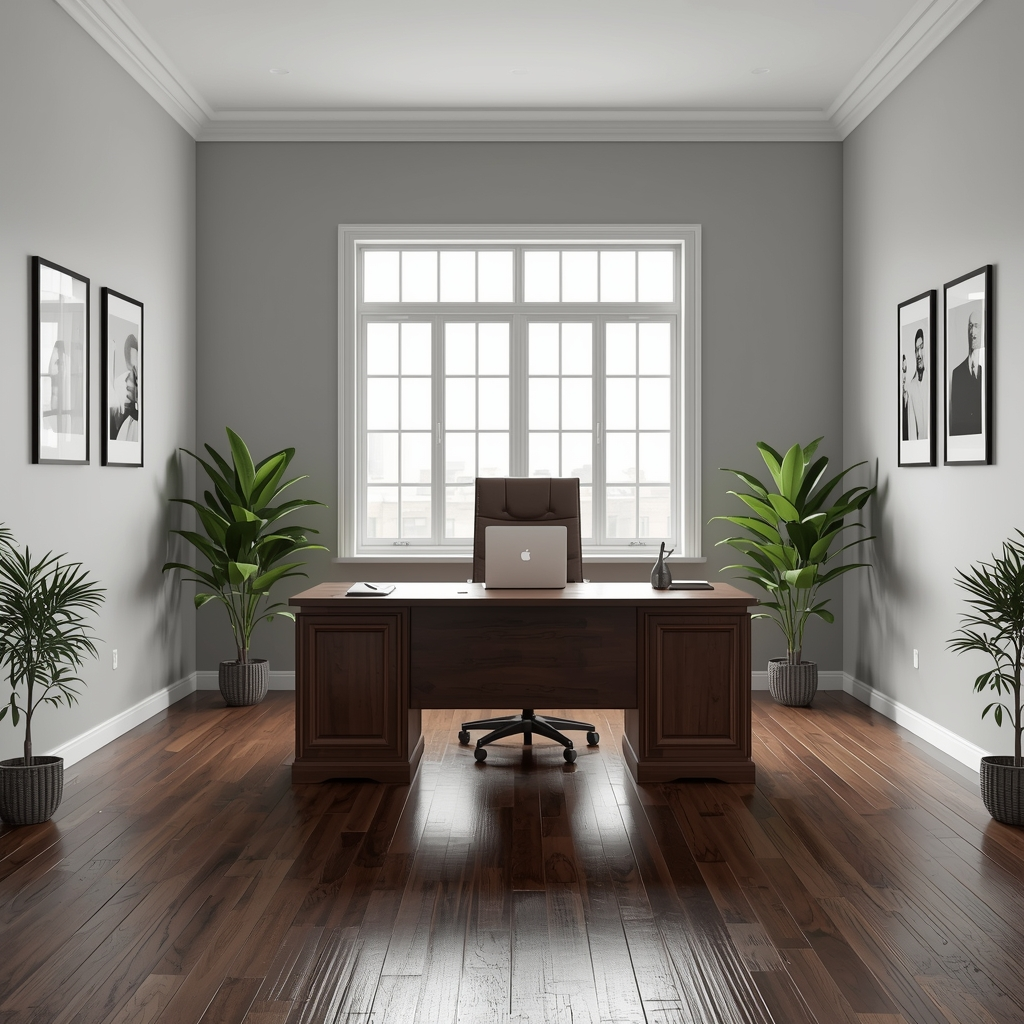

In [189]:
# Importing Packages:

# EDA:
import pandas as pd # For Feature Manipulation

import numpy as np # For Maths

import seaborn as sns
import matplotlib.pyplot as plt # For Visualization

# For Preprocessing:
from sklearn.model_selection import train_test_split # For Splitting the Data

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler # For Scaling the Data

from sklearn.preprocessing import OneHotEncoder, LabelEncoder # For Encoding the Data

from sklearn.compose import ColumnTransformer # Column Transformer

from sklearn.pipeline import Pipeline # Pipeline

# Model and Evaluation:
from sklearn.linear_model import LogisticRegression # As we have classes in data, we'll choose Model from regression family

from sklearn.metrics import accuracy_score, classification_report # Accuracy check

In [190]:
df = pd.read_csv("bank.csv")
print(df.shape, df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
(11162, 17) None


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Dataset of bank customers is given. The task is to predict whether a customer will subscribe to a term deposit or not.

In [191]:
df.drop(columns=['campaign', 'pdays', 'previous', 'poutcome'], axis=1, inplace=True)

Removed extra columns

In [192]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
deposit      0
dtype: int64

In [193]:
df.duplicated().sum()

np.int64(0)

No missing values or duplicates in the dataset

In [194]:
df.describe()

,age,balance,day,duration
count,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818
std,11.913369,3225.413326,8.420740,347.128386
min,18.000000,-6847.000000,1.000000,2.000000
25%,32.000000,122.000000,8.000000,138.000000
50%,39.000000,550.000000,15.000000,255.000000
75%,49.000000,1708.000000,22.000000,496.000000
max,95.000000,81204.000000,31.000000,3881.000000


- Age 18-95
- Balance is in minus too
- Duration's 75% data is under 496 seconds

Since 'deposit' is our target variable, let's see how other features are correlated with it.

In [195]:
df['deposit'] = df['deposit'].map({'yes':1, 'no':0})
df['default'] = df['default'].map({'yes':1, 'no':0})

Encoded 2 columns to check correlation with target variable 'deposit'

In [196]:
for i in df.select_dtypes(include='number').columns:
    if i != 'deposit':
        df[i].corr(df['deposit'])
        print(f'Correlation of {i} with deposit: {df[i].corr(df["deposit"])}')

Correlation of age with deposit: 0.034900927890282714
Correlation of default with deposit: -0.040680087081149674
Correlation of balance with deposit: 0.08112858919103574
Correlation of day with deposit: -0.05632583922269357
Correlation of duration with deposit: 0.45191936084258355


- Duration is moderately correlated with deposit

<Axes: >

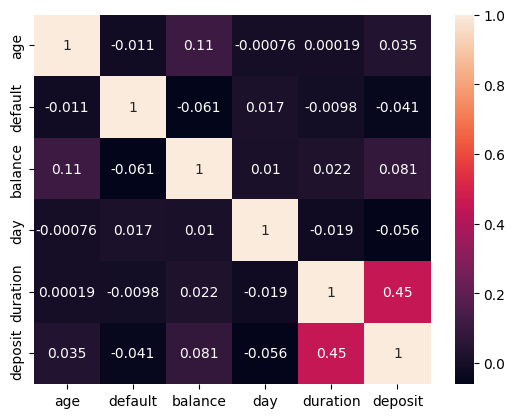

In [197]:
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)

## **Balance Of Classes**

In [198]:
df['deposit'].value_counts() / df.shape[0] * 100

deposit
0    52.616019
1    47.383981
Name: count, dtype: float64

- Almost Balanced Classes

## **What is the distribution of customer ages? Are there any outliers or unusual age ranges?**

<Axes: xlabel='age', ylabel='Count'>

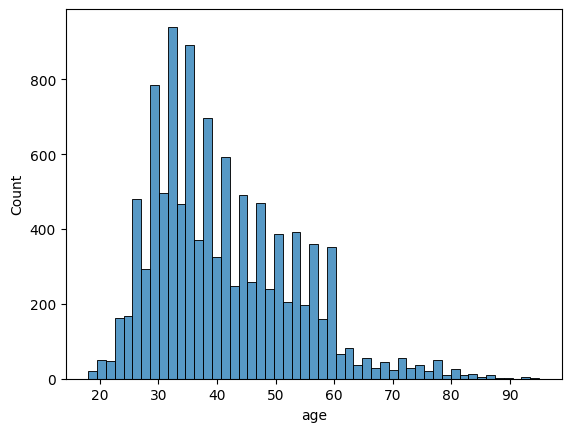

In [199]:
sns.histplot(df['age'])

Distribution of Customer Age:
- It's almost normal
- Most of data lies 27-60

<Axes: ylabel='age'>

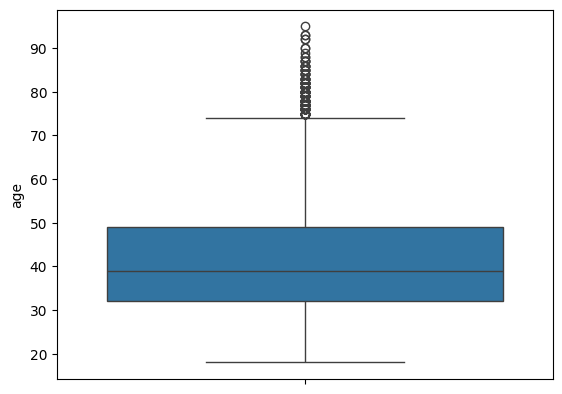

In [200]:
sns.boxplot(df['age'])

- some outliers after age: 70, but will be useful for model training

## **How many customers belong to each job category? Which job has the highest and lowest number of customers?**

In [201]:
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

- Highest job count: Management 
- Lowest job count: Housemaid then unknown

## **What is the distribution of marital status? Does it vary with other features like age or balance?**

<Axes: xlabel='marital', ylabel='Count'>

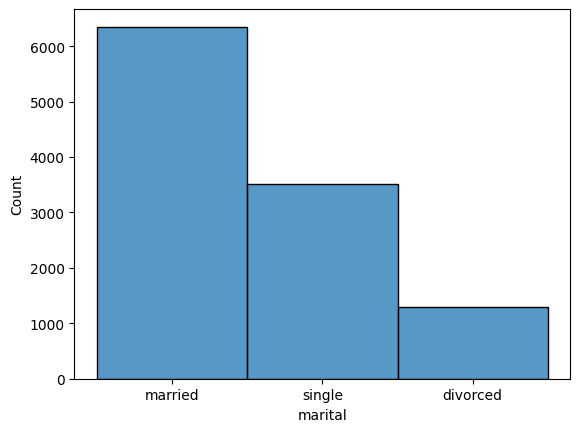

In [202]:
sns.histplot(df['marital'])

<Axes: xlabel='age', ylabel='balance'>

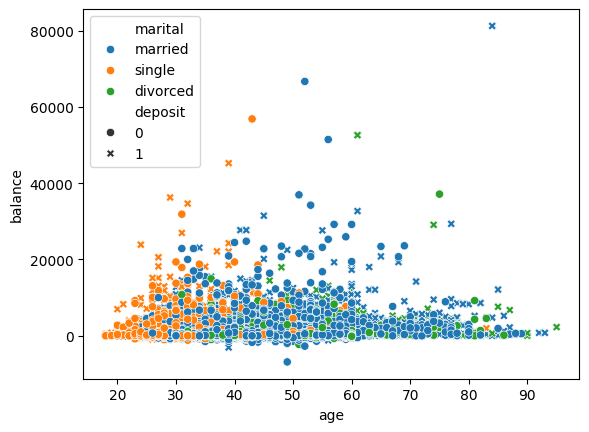

In [203]:
sns.scatterplot(data=df, x='age', y='balance', hue='marital', style='deposit')

- Deposit variable is scattered in all intervals

## **How are education levels distributed? Are certain education levels associated with higher balances?**

<Axes: xlabel='education', ylabel='Count'>

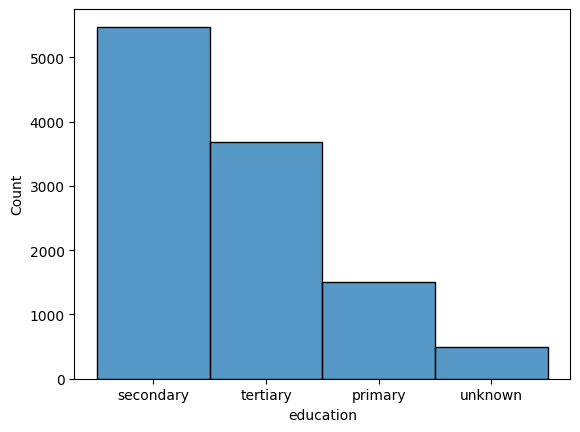

In [204]:
sns.histplot(df['education'])

- Most customers have secondary education

<Axes: xlabel='education', ylabel='balance'>

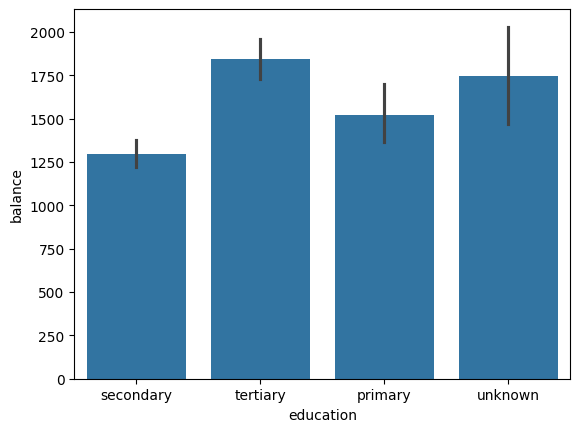

In [205]:
sns.barplot(data=df, x='education', y='balance')

- Tertiary education customers have higher balance on average

## **What is the distribution of account balance?**

<Axes: xlabel='balance', ylabel='Count'>

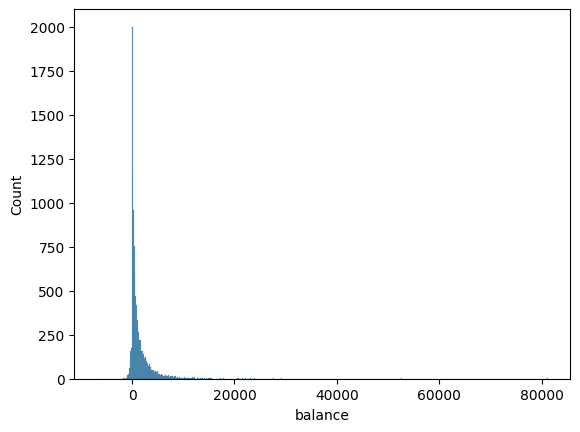

In [206]:
sns.histplot(df['balance'])

## **How does the deposit subscription rate vary with the contact method?**

In [207]:

df[['contact', 'deposit']].value_counts()

contact    deposit
cellular   1          4369
           0          3673
unknown    0          1816
           1           530
telephone  1           390
           0           384
Name: count, dtype: int64

## **Are there seasonal trends? Which months/days have higher deposit rates?**

<Axes: xlabel='month', ylabel='day'>

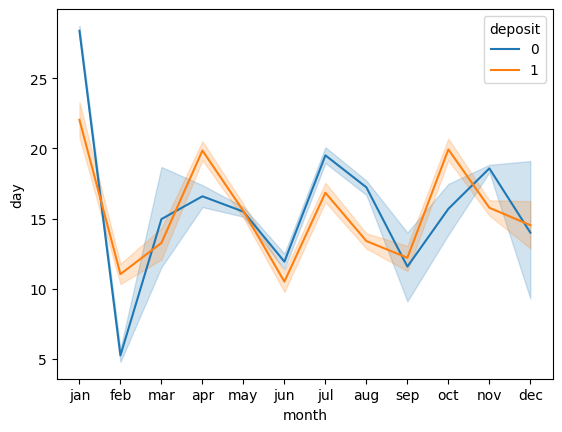

In [208]:
month_order = ['jan','feb','mar','apr','may','jun', 'jul','aug','sep','oct','nov','dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

sns.lineplot(data=df, hue='deposit', y='day', x='month',size_order=month_order)

- No Patterns observed in months and days

In [209]:
iqr = df['balance'].quantile(0.75) - df['balance'].quantile(0.25)
lower_bound = df['balance'].quantile(0.25) - (1.5 * iqr)
upper_bound = df['balance'].quantile(0.75) + (1.5 * iqr)
outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]
outliers.shape

(1055, 13)

remove outliers from balance column

- Outliers exists in dataset but they are useful for model training

Features selection based on correlation with target variable 'deposit' & accuracy of model trained on those features.

In [218]:
x=df[['balance', 'duration', 'housing','month', 'contact', 'default', 'marital', 'age']]
y=df['deposit']

yencoder= LabelEncoder()
model= LogisticRegression()

y = yencoder.fit_transform(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=2)

pipe = Pipeline(steps=[
                ("preprocessor", ColumnTransformer(transformers=[
                ("num", StandardScaler(), x.select_dtypes(include='number').columns.tolist()),
                ("cat", OneHotEncoder(), x.select_dtypes(include=['object', 'category']).columns.tolist())],
                remainder="drop")),
                ("model", LogisticRegression())]) 

pipe.fit(xtrain, ytrain)
ypred = pipe.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest, ypred)*100:.2f}%')

Accuracy: 80.83%


In [211]:
ypred = pipe.predict(xtest)
print(f'Accuracy: {accuracy_score(ytest, ypred)*100:.2f}%')

Accuracy: 80.83%


In [212]:
print(classification_report(ytest, ypred))


              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1187
           1       0.81      0.77      0.79      1046

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



In [213]:
import joblib
joblib.dump(pipe, 'bank_deposit_model.pkl')

['bank_deposit_model.pkl']